In [1]:
cd ..

/home/osselinp/semisupervised


In [57]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
import imageio
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
data_path = "./logs/testfunction/sphere_test/SNES/seed-0000_Beta-1.0_VarPrior-100.0_Noise-0.0_Dim-2.pt"
with open(data_path, "rb") as fp:
    data = torch.load(data_path, map_location="cpu")


In [41]:
save_path = "./logs/testfunction/sphere_test/SNES"

In [18]:
def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

In [10]:
obj = data["objective"]
bounds = data["bounds"]

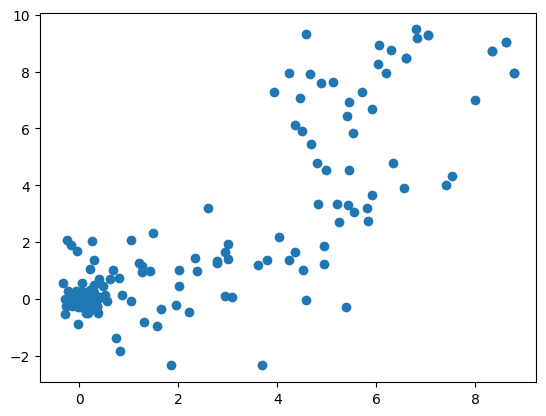

In [39]:

plt.scatter(data["X"].numpy()[:,0], data["X"].numpy()[:,1])

In [38]:
data["X"].numpy()

array([[ 8.77275512e+00,  7.95295180e+00],
       [ 7.03483502e+00,  9.27861279e+00],
       [ 6.60521176e+00,  8.48687404e+00],
       ...,
       [-3.54434847e-05,  5.04516904e-05],
       [-3.91501081e-05,  4.01185940e-05],
       [-2.86168201e-05, -4.21844069e-06]])

In [4]:
bounds = 5

In [68]:
BATCH_SIZE = data["BATCH_SIZE"]

In [11]:
b = np.arange(-bounds, bounds, 0.05)
d = np.arange(-bounds, bounds, 0.05)
B, D = np.meshgrid(b, d)
n = b.shape[0]


In [12]:
res = torch.stack((torch.tensor(B.flatten()), torch.tensor(D.flatten())), axis = 1)

In [13]:
nu = obj(res).numpy().reshape(n, n)

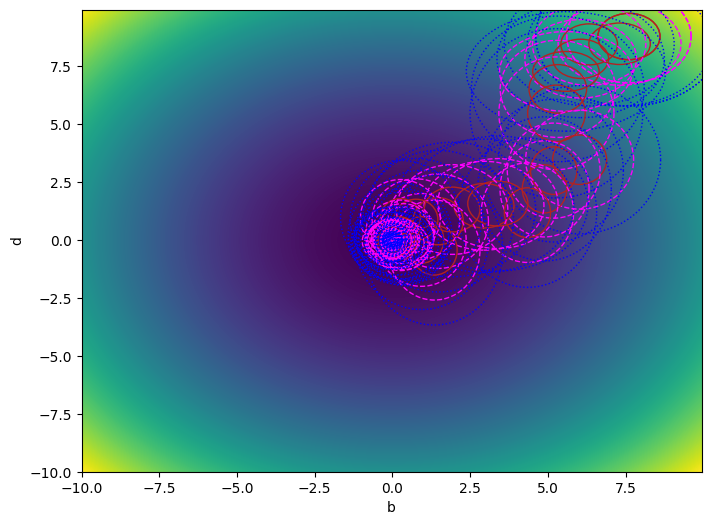

In [32]:
_, ax = plt.subplots(1, 1, figsize=(8, 6))

contour = plt.contourf(B, D, nu, levels=500)
ax.set_xlabel('b')
ax.set_ylabel('d')

mu = data["mu"]
sigma = data["sigma"]

for i, _ in enumerate(mu):

    plot_cov_ellipse(np.diag(sigma[i].numpy()), mu[i].numpy(), nstd=1, ax=ax, facecolor="none", edgecolor = 'firebrick')
    plot_cov_ellipse(np.diag(sigma[i].numpy()), mu[i].numpy(), nstd=2, ax=ax, facecolor="none", edgecolor = 'fuchsia', linestyle='--')
    plot_cov_ellipse(np.diag(sigma[i].numpy()), mu[i].numpy(), nstd=3, ax=ax, facecolor="none", edgecolor = 'blue', linestyle=':')

plt.show()

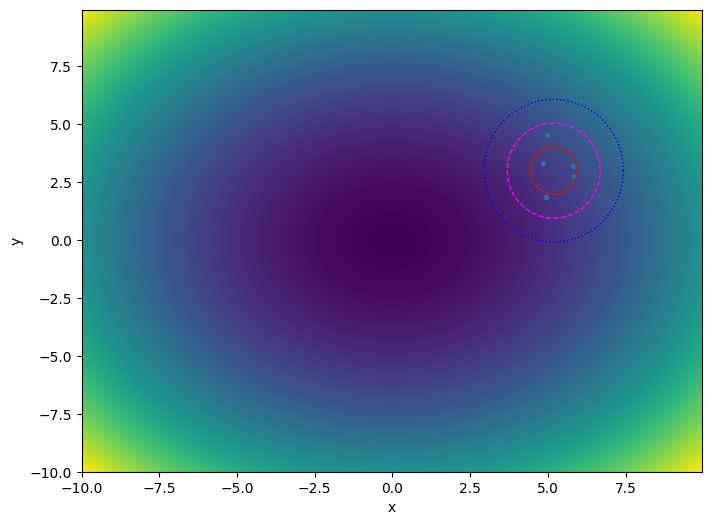

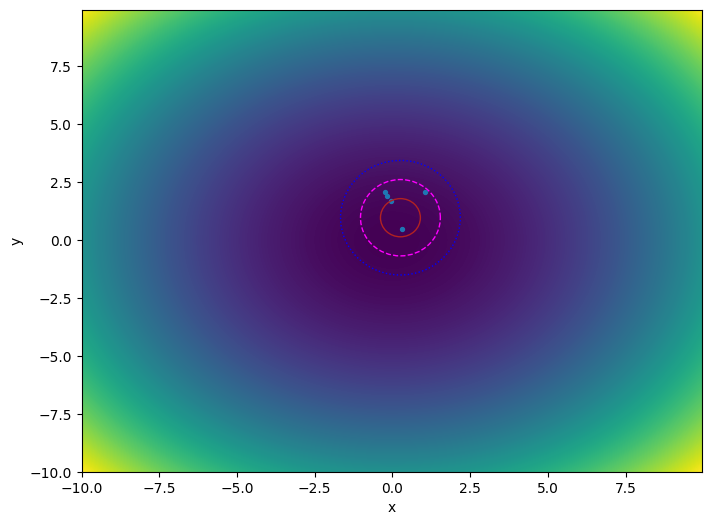

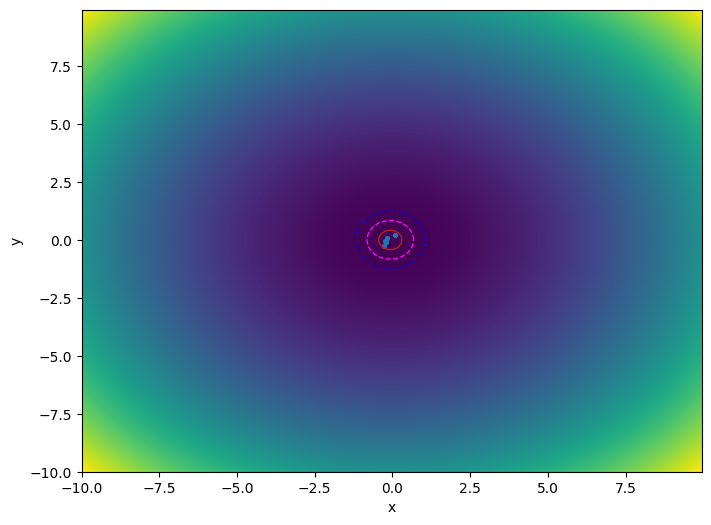

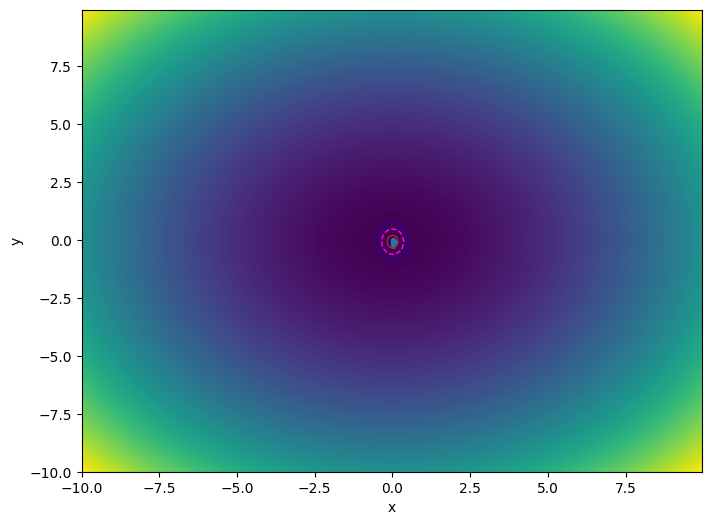

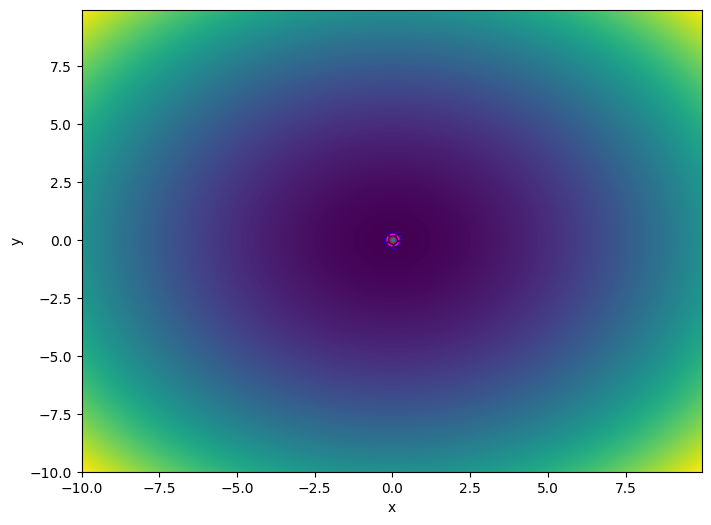

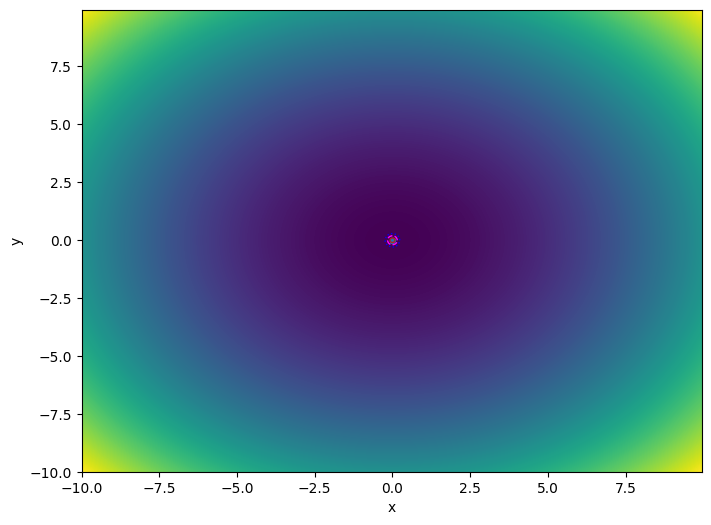

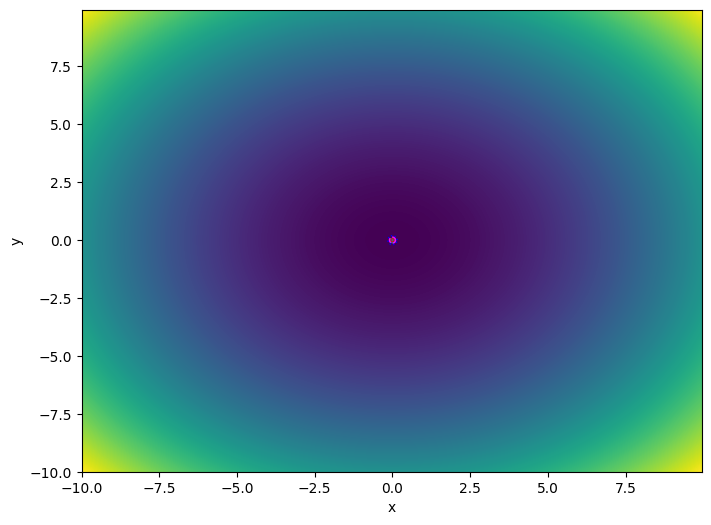

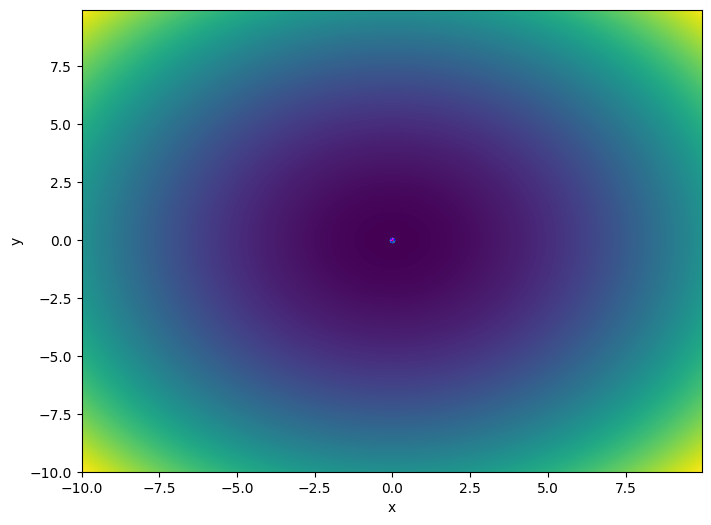

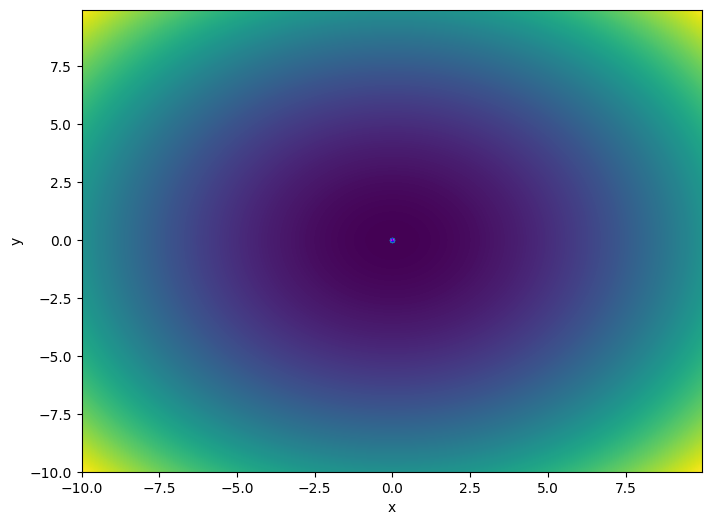

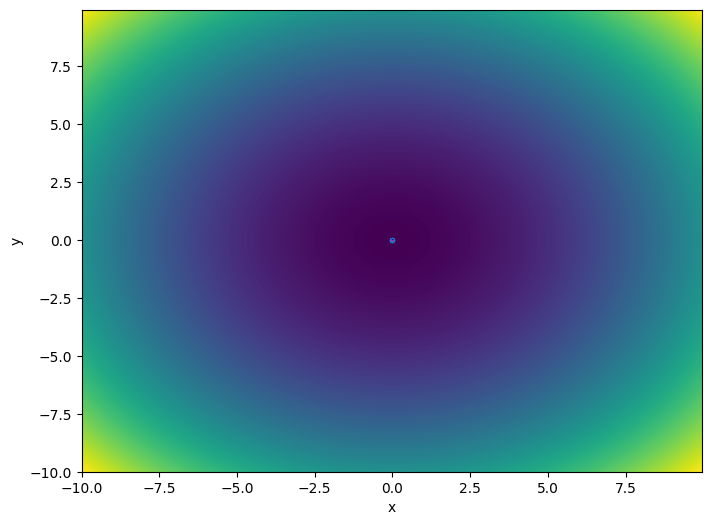

In [75]:
plot_path = os.path.join(save_path, "0")
X = data["X"]
for i, _ in enumerate(mu):
    if ((i+1) % 10) == 0:
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        ax.contourf(B, D, nu, levels=500)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        plot_X = X[(i-1)*BATCH_SIZE:i*BATCH_SIZE].numpy()
        ax.scatter(plot_X[:,0], plot_X[:,1], s=8)
        plot_cov_ellipse(np.diag(sigma[i].numpy()), mu[i].numpy(), nstd=1, ax=ax, facecolor="none", edgecolor = 'firebrick')
        plot_cov_ellipse(np.diag(sigma[i].numpy()), mu[i].numpy(), nstd=2, ax=ax, facecolor="none", edgecolor = 'fuchsia', linestyle='--')
        plot_cov_ellipse(np.diag(sigma[i].numpy()), mu[i].numpy(), nstd=3, ax=ax, facecolor="none", edgecolor = 'blue', linestyle=':')
        fig.savefig(os.path.join(plot_path, f"plot{i}.png"))


In [71]:
images = []
for i, _ in enumerate(mu):
    if ((i+1) % 10) == 0:
        images.append(imageio.imread(os.path.join(plot_path, f"plot{i}.png")))
imageio.mimsave(os.path.join(plot_path, f"gif{0}.gif"), images, duration=0.5)

/tmp/ipykernel_19630/2205584002.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(os.path.join(plot_path, f"plot{i}.png")))


In [63]:
plot_path

'./logs/testfunction/sphere_test/SNES/0'

In [59]:
images

[Array([[[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],
 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],
 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],
 
        ...,
 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255]],
 
        [[255, 255, 255, 255],
         [255, 255, 255, 255],
         [255, 255, 255, 255],
         ...,
         [255, 255, 255, 255],
         [255, 255, 255, 255],
    

In [50]:
X.shape

NameError: name 'X' is not defined

In [52]:
data["X"].shape

torch.Size([505, 2])